# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. Collect and load data

In [7]:
df = pd.read_csv('bigcity.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [8]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


### 3a. Visualize numeric variables in boxplot and histograms
### 3b. Measure spread – variance and standard deviation

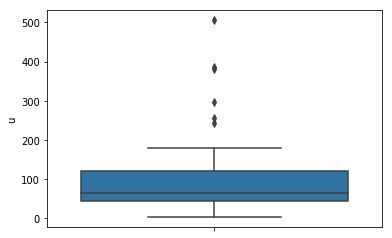

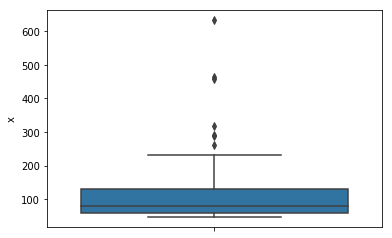

In [9]:
sns.boxplot(data=df,x='u',orient='v')
plt.show()
sns.boxplot(data=df,x='x',orient='v')
plt.show()

In [10]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

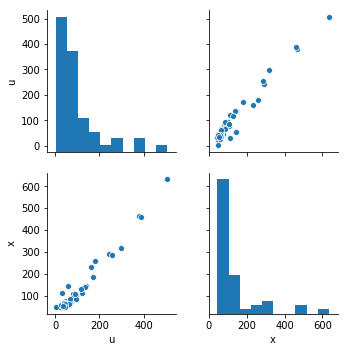

In [11]:
sns.pairplot(df)

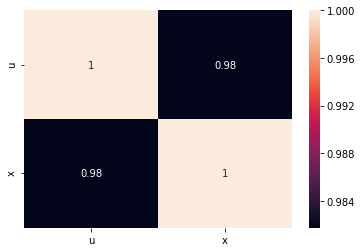

In [12]:
sns.heatmap(df.corr(),annot=True)
#u and x exhibit high correlation, so for predicting a population value for a target variable(if added, we would need only one
#variable). But, in this case we will predict x with u

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [15]:
df = df.rename(columns={'u':'1920','x':'1930'})

In [16]:
x = df['1920']
y = df['1930']
print(x.shape,y.shape)

(49,) (49,)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [17]:
df.isna().sum().sum()

0

In [18]:
df.corr()

,1920,1930
1920,1.000000,0.981742
1930,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [19]:
x1 = sm.add_constant(x)
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x1, y)}')

Coefficients: [0.        1.1577337]
Intercept: 8.3839563331926
R^2 score: 0.963817258548811


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

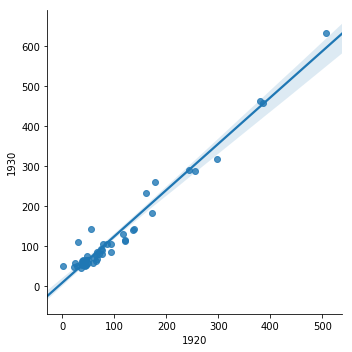

In [22]:
sns.lmplot(data=df,x='1920',y='1930',fit_reg=True)

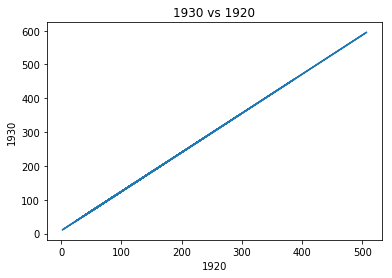

In [23]:
##Or else another way:
x1 = x
y1 = 1.1577337*x1 + 8.3839563331926
plt.plot(x1,y1)
plt.xlabel('1920')
plt.ylabel('1930')
plt.title('1930 vs 1920')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [24]:
# R square value for both train and test data to check if the model works properly
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')
ypred1 = lin_reg.predict(x_test)
ypred2 = lin_reg.predict(x_train)
rmse_test = np.sqrt(mean_squared_error(y_test,ypred1))
rmse_train = np.sqrt(mean_squared_error(y_train,ypred2))
print("For test",rmse_test,"and for Train",rmse_train)

R^2 score for train: 0.9652735334606501
R^2 score for test: 0.92536721776934
For test 18.710703893730713 and for Train 24.29977876180661


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [25]:
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg.score(x_test, y_test)}')

R^2 score: 0.9652735334606501
R^2 score: 0.92536721776934
